### Simulation model

Take true model

$$y_i=\beta x_i$$

$\vec{X} is a sample of observed variables and \vec{Y} is a response variable to that sample.

We want to compare two models:

$$y_i=\beta_0 + \beta_1 x_i + \epsilon_i$$

and

$$y_i=\beta x_i + \epsilon_i$$

We assume that $$y_i \sim \mathcal{N}(\beta_0+\beta_1 x_i, \sigma ^2)$$

For $\sigma^2$ we can calculate sample variance from $\frac{\mathcal{dl}}{\mathcal{d\sigma}}$, where $\mathcal{l}$ is log-likelihood function.

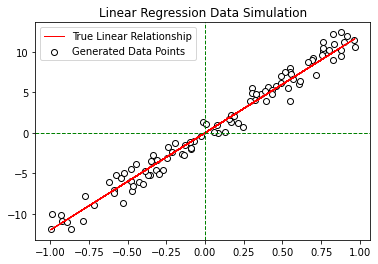

In [109]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 100  # number of sample points

X = np.random.rand(num_samples) * 2 - 1

beta =  12 # true slope
noise = np.random.randn(num_samples)

y = beta * X + noise


plt.plot(X, beta * X, color='red', linewidth=1, label='True Linear Relationship')
plt.scatter(X, y, color='white', edgecolor='black', marker='o', label='Generated Data Points')
plt.legend()

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.title('Linear Regression Data Simulation')
plt.show()

We will compare two regression models:

One is with intercept term and the other one is a no-intercept

$$
\hat{\beta_1} = \frac{S_{xy}}{S_{xx}}
$$

$$
S_{xy} = \sum (x_i- \bar{x})y_i
$$

$$
S_{xx} = \sum (x_i- \bar{x})^2
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x} 
$$

$$
\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}
$$

In [110]:
mean_x = np.average(X)
mean_y = np.average(y)

Sxx = np.sum((X-mean_x)**2)
Sxy = np.sum((X-mean_x)*y)


beta_1_hat = Sxy/Sxx
beta_0_hat = mean_y - beta_1_hat * mean_x

beta_hat = np.sum(X*y)/np.sum(X**2) 


Let's plot regression lines:


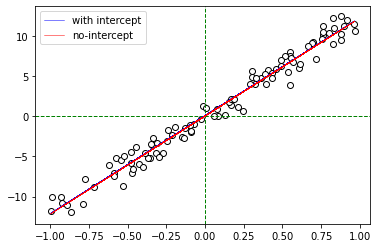

In [111]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')


plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

Zoom a little bit...

(-0.25, 0.25)

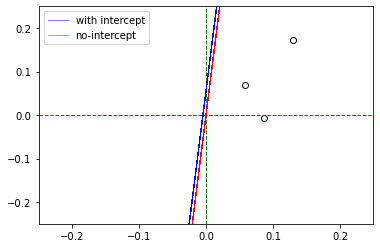

In [112]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

plt.xlim(-0.25, 0.25)  # x-axis limits from 0 to 6
plt.ylim(-0.25, 0.25)  # y-axis limits from 0 to 6


Let's compare $SS_{error}$ of two models.
(Reminder: $SS_{error} = \sum (y_i-\hat{y_i})^2$)

In [113]:
y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
y_hat_hat = beta_hat * X  # no-intercept response variable

SS_error_intercept = np.sum((y-y_hat)**2)
SS_error_no_intercept = np.sum((y-y_hat_hat)**2)

print(f"SSE of intercept model: {SS_error_intercept}")
print(f"SSE of no-intercept model: {SS_error_no_intercept}")

SSE of intercept model: 112.65963419519184
SSE of no-intercept model: 112.96077832978753
